INF8770 Technologies multimédias <br>
Polytechnique Montréal <br>
Auteur : Mehdi Miah

Description : ce notebook implémente la description d'une image avec un réseau de neurones (ResNet-18) sur CPU. <br>
Plusieurs modèles de réseaux de neurones sont disponibles avec pytorch : https://pytorch.org/vision/stable/models.html#classification

In [ ]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models

from PIL import Image
from einops import rearrange
from IPython.display import display
import matplotlib.pyplot as plt

## Chargement de l'image 

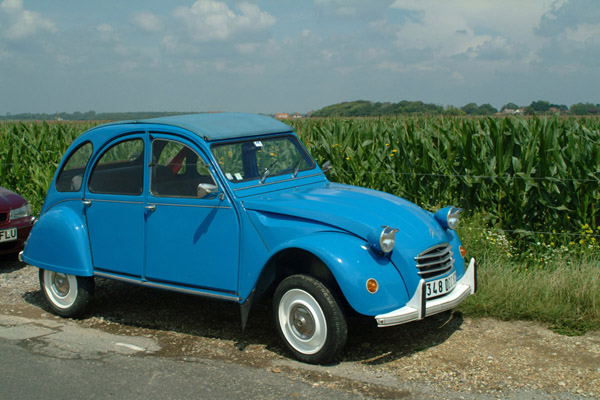

In [2]:
image_path = "RGB.jpg"
image = Image.open(image_path)
display(image)

## Chargement du réseau de neurones ResNet-18

In [3]:
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)   # le modèle est chargé avec des poids pré-entrainés sur ImageNet
model = torch.nn.Sequential(*(list(model.children())[:-1]))        # supprime la dernière couche du réseau
model.eval();                                                      # mode évaluation pour désactiver certaines couches comme BatchNorm ou Dropout

## Calcul du descripteur de l'image

In [4]:
# Pré-processing
preprocess = transforms.Compose([
   transforms.Resize((224, 224)),                       # change la taille de l'image en 224x224
    transforms.ToTensor(),                              # convertit une image PIL ou numpy.ndarray (HxWxC) dans la plage [0, 255] en un torch.FloatTensor de forme (CxHxW) dans la plage [0.0, 1.0]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],    # normalise les valeurs 
                         std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image)         # 3 x 224 x 224
input_batch = input_tensor.unsqueeze(0)  # Ajout d'une dimension de batch : 1 x 3 x 224 x 224

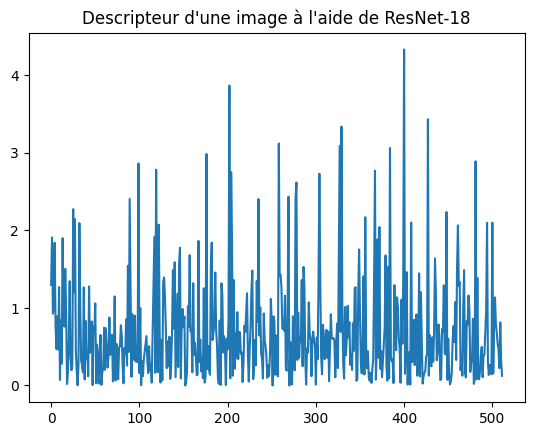

In [5]:
# Calcul du descripteur
with torch.no_grad():
    output = model(input_batch)  # 1 x 512 x 1 x 1 

# torch.no_grad() permet de désactiver la conservation en mémoire des matrices d'activation nécessaires 
# lors de la mise à jour des paramètres lors de l'apprentissage avec la rétropropagation des gradients. 
# Cela permet de réduire la consommation de mémoire graphique.

output = rearrange(output, 'b d h w -> (b d h w)')  # 512

# Visualisation
plt.plot(output)
plt.title(f"Descripteur d'une image à l'aide de ResNet-18")
plt.show()
